Hello everyone! In this notebook we try to understand if doing a PhD is the best bang for your bucks. As PhD students ourselves, we are totally aware that the value of doing a PhD goes beyond the mere financial aspect. Still, we think it is an interesting question to ask. To answer it we use data about the salary of STEM workers from companies such as Apple, Amazon, Microsoft and other tech companies.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
import scipy.stats as st

data = pd.read_csv("Levels_Fyi_Salary_Data.csv")
data.head()

ModuleNotFoundError: No module named 'squarify'

There is a lot of information in this dataset: the title of the workers, the company where they work, the location of the office, the yearly salary, the years of experience, the level of education and a bunch of binary variables that indicate if a worker has a specific characteristic, such as having a PhD or being Asian. Let us give a deeper look at the columns.

In [ ]:
data.info()

As we can see there are 28 columns:
* 5 are real numbers, hence numerical quantities. These are variables such as years of experience, base salary and others;
* several are integers, among which total yearly compensation, which is of chief interest to us;
* multiple columns are objects. We have to understand how to deal with these variables.

Let us formulate our question precisely: is the average salary of workers who hold a PhD higher than the average salary of workers who do not have a PhD? To answer this question we do not need all the columns of the dataset. Let us clean the dataset by removing such columns and certain rows with weird values.

In [3]:
drop_list = ["otherdetails","Race","Race_Hispanic","Race_Black","Race_Two_Or_More","Race_White","Race_Asian","dmaid",
             "cityid","tag","location","timestamp","company"]
data = data.drop(drop_list, axis = 1)
data = data.loc[data["gender"]!="Title: Senior Software Engineer"]
data = data[data["Education"].notna()]

We removed the null-values in the Education column. Let us see how workers are distributed among education levels.

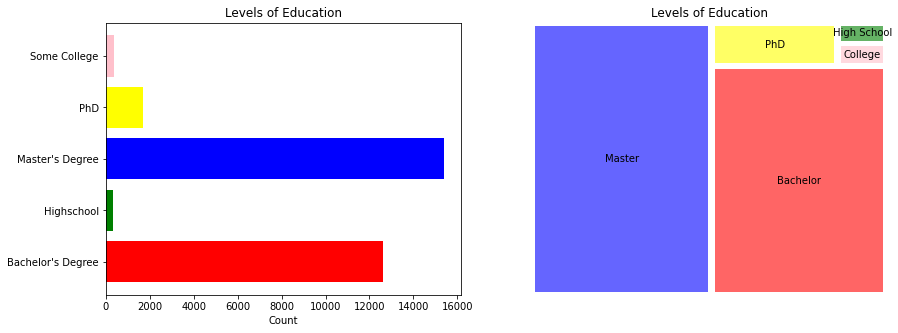

In [4]:
series = data["Education"].value_counts()
sq = series.sort_index()
col1 = ["Red","Green","Blue","Yellow","Pink"]
col2 = ["Blue","Red","Yellow","Pink","Green"]
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].set_title("Levels of Education")
axes[0].barh(sq.index,sq.values, color = col1)
axes[0].set_xlabel("Count")
labels = ["Master","Bachelor","PhD","College","High School"]
axes[1].set_title("Levels of Education")
squarify.plot(sizes = series, label = labels, color = col2, alpha = 0.6, ax = axes[1], pad = True)
plt.axis("off")
plt.show()

Clearly PhDs are a small minority in the data as most workers have either a Bachelor or a Master. To confirm this we can exploit the column named Doctorate Degree: this is a binary variable with value 1 if the worker has a PhD and 0 otherwise. 

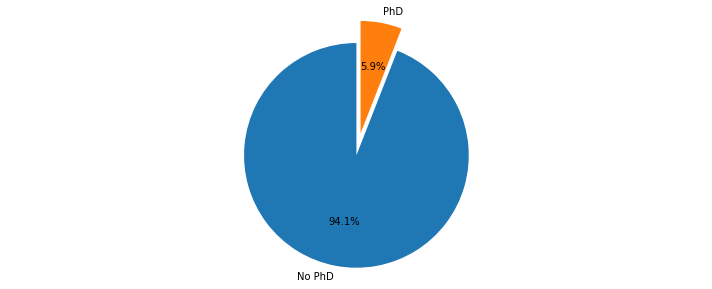

In [5]:
labels =  ['No PhD','PhD']
exp = (0,0.2)
fig1, ax1 = plt.subplots(figsize = (10,4))
ax1.pie(data["Doctorate_Degree"].value_counts(), explode=exp, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.show()

From the pie chart we see that only 5.9% of workers have a PhD. We are now going to look at the average salary of PhDs and compare it with the average salary of workers with other levels of education. However, we have to keep in mind that the classes are very unbalanced, as PhDs are far fewer than workers holding a Msc or a Bsc.

Education
Bachelor's Degree    177845.409095
Highschool           187731.250000
Master's Degree      220731.076603
PhD                  291865.531415
Some College         210121.126761
Name: totalyearlycompensation, dtype: float64
Education
Bachelor's Degree    117969.030391
Highschool           121207.623723
Master's Degree      138376.175034
PhD                  150201.764434
Some College         129397.405989
Name: totalyearlycompensation, dtype: float64


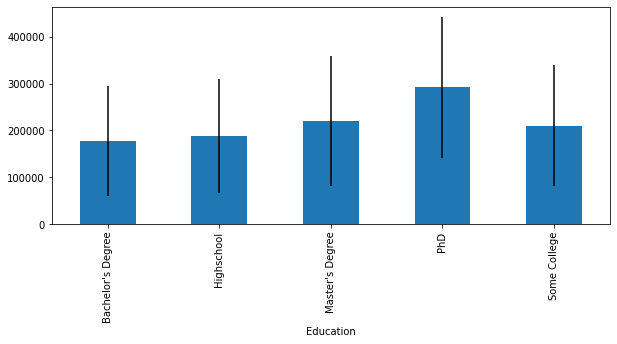

In [6]:
cond_mean = data["totalyearlycompensation"].groupby(data["Education"]).aggregate("mean")
cond_std = data["totalyearlycompensation"].groupby(data["Education"]).aggregate("std")
print(cond_mean)
print(cond_std)
cond_mean.plot(kind="bar",figsize=(10,4),yerr = cond_std)
plt.show()

The bar plot shows that PhDs have, on average, a higher salary with respect to all other education levels. However, also the standard deviations are pretty large, as shown by the black bars in the plot. Hence, the data suggest that PhDs have a higher salary than other workers, but we cannot be that confident in this claim. Just out of curiosity, let us compute the difference in average salary between workers with an Msc and workers with a PhD.

In [7]:
yearly_percent_gain = (cond_mean["PhD"]-cond_mean["Master\'s Degree"])/cond_mean["Master\'s Degree"]*100
yearly_percent_gain

32.22675117007322

This very first result says that the increment in the average salary between the class of PhDs and the class of workers who have a Master's degree is around 33%. Let us visualise the data with a boxplot.

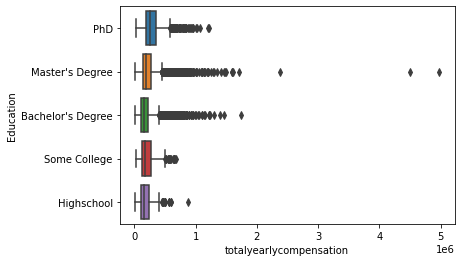

In [8]:
ax = sns.boxplot(x="totalyearlycompensation", y="Education", data=data, orient = "h")

The previous boxplot is very hard to understand, as we have too many outliers. Let us now remove them to improve the visualisation. However, note that outliers, that is workers with an unusually high salary, are much more common among people with a Master's Degree than in the other classes. We are going to remove the outliers by setting the option "showflier" to False. This applies the interquantile range method to the data. 

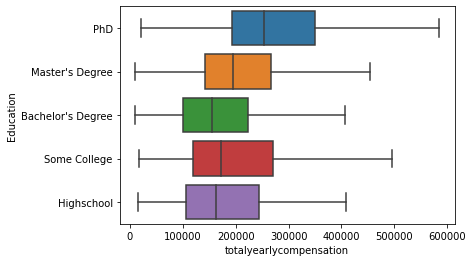

In [9]:
ax = sns.boxplot(x="totalyearlycompensation", y="Education", data=data, orient = "h", showfliers = False)

The above boxplot is much more clear to understand than the previous one and it conveys the same information. The median income of PhDs is relevantly larger than the median income of the other classes. This is encouraging but we have to take into account that other hidden variables may play a role here. For example, does the impact of having a PhD on the average salary depend on the job title? It seems reasonable to think so. Let us check the distribution of workers among job titles.   

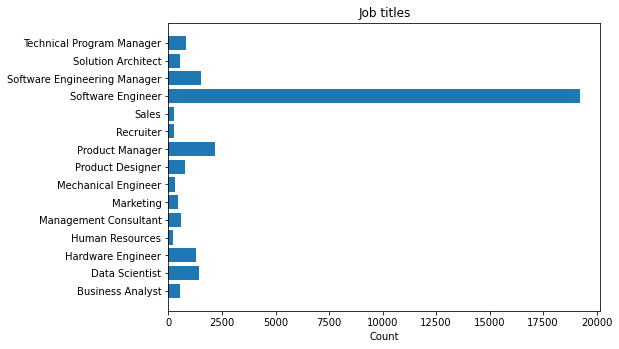

In [10]:
series = data["title"].value_counts()
sq = series.sort_index()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(sq.index,sq.values)
ax.set_title("Job titles")
ax.set_xlabel("Count")
plt.show()

As we can see from the previous barplot the vast majority of workers are Software Engineers. This is hardly surprising, as the data are from tech companies. To understand if the job title has an effect on the influence of the PhD on the salaries, we make the boxplot of total yearly compensation with respect to the education level, for two different job titles. For visualisation purposes, let us choose Data Scientists and Solution Architects.

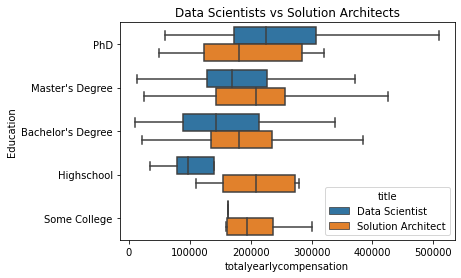

In [11]:
my_job = ["Data Scientist","Solution Architect"]
data_t = data[data["title"].isin(my_job)]
ax = sns.boxplot(x="totalyearlycompensation", y="Education", data=data_t, hue = "title", orient = "h", showfliers = False)
ax.set_title("Data Scientists vs Solution Architects")
plt.show()

The boxplot confirms that the job title does influence the effect of having a PhD on the salary. For example, Data Scientists with a PhD have a median income larger than Data Scientists with only a Master's Degree, whereas the opposite holds for Solution Architects. Let us also give a look at the percentage of PhDs per job title.

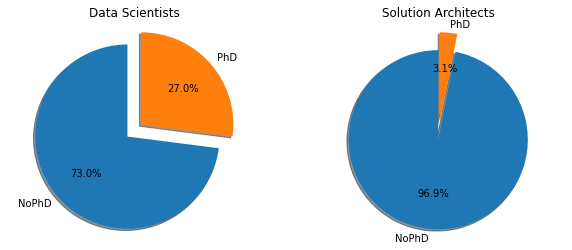

In [12]:
labels =  'NoPhD','PhD'
explode = (0,0.2)
data_sc = data[data["title"]=="Data Scientist"]
data_sa = data[data["title"]=="Solution Architect"]
fig1, ax1 = plt.subplots(1,2, figsize = (10,4))

plt.subplot(1,2,1)
ax1[0].pie(data_sc["Doctorate_Degree"].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1[0].axis('equal')
ax1[0].set_title("Data Scientists")
plt.subplot(1,2,2)
ax1[1].pie(data_sa["Doctorate_Degree"].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1[1].axis('equal')
ax1[1].set_title("Solution Architects")
plt.show()

Clearly, the job title influences not only the effect of having a PhD on the salary, but also the distribution of PhDs. As we can see from the pie charts, while it is not uncommon to have a PhD among data scientists, it is very rare to have a PhD among solution architects.

Given everything we have seen so far, we believe that we cannot answer our question with such heterogeneous classes. Since we are all here on Kaggle, we are mostly interested in a specific type of jobs, therefore we are going to continue our analysis by considering only jobs related to data science, data analysis and computer science in general.

In [13]:
my_job = ["Data Scientist","Business Analyst","Software Engineer","Software Engineer Manager"]
my_data = data[data["title"].isin(my_job)]

Another hidden variable that might influence the effect of having a PhD on the salary are the years of experience. In general, we expect as the years of experience increase, the effect of the PhD on the salary diminishes. Let us see how workers are distributed by years of experience.

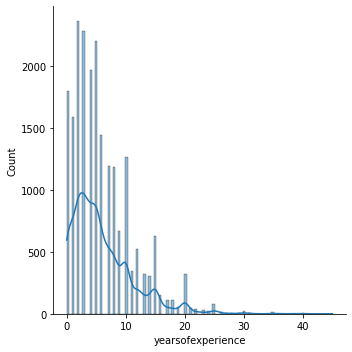

In [14]:
sns.displot(data = my_data, x = "yearsofexperience", kde = True)
plt.show()

As we can see from the previous plot, the majority of workers have at most 10 years working experience. This might be the reason why the data suggests that having a PhD has such a big impact on the salary: a worker with 3 years of experience should benefit more from a PhD than a 10 years experienced employee who has already proven its value and does not need an academic title to show his/her skills.
To check if this holds, we split the population in three groups according to the years of experience.

In [15]:
my_data_c = my_data.copy()
conditions = [
    my_data_c["yearsofexperience"]<=3,
    (my_data_c["yearsofexperience"]>3) & (my_data_c["yearsofexperience"]<=10),
    (my_data_c["yearsofexperience"]>10)
]
values = [0,1,2]
my_data_c["simple_years"] = np.select(conditions, values)

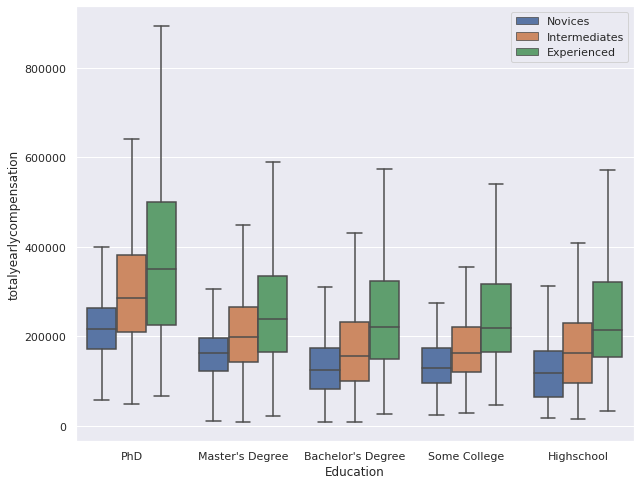

In [16]:
sns.set(rc={'figure.figsize':(10,8)})
lab =  ["Novices","Intermediates","Experienced"]
ax = sns.boxplot(y="totalyearlycompensation", x="Education", hue = "simple_years", data=my_data_c, showfliers= False)
h, l = ax.get_legend_handles_labels()
ax.legend(h, lab)
plt.show()

It looks like having a PhD has a positive effect on the salary independently on the years of experience.

We are now ready to test the results we have obtained so far. We are going to use a t-test to understand if the average salary of PhDs is actually larger than the average salary of MScs. Note that so far we have shown that this holds only on the current dataset, but we have no guarantees that this is true on the entire population. To see if the results can be extended we perform an hypothesis test: 

$ \mathbf{H_0}: \quad \mu_{\mathrm{PhD}} = \mu_{\mathrm{MSc}} $

$ \mathbf{H_1}: \quad \mu_{\mathrm{PhD}} \neq \mu_{\mathrm{MSc}} $

where $ \mu $ represents the average salary of a given class. Note that:
* the null hypothesis $ \mathbf{H_0} $ is that the PhD has no effect on the salary. The goal of a test is to reject the null hypothesis only if we collect enough evidence of the contrary;
* the alternative hypothesis $ \mathbf{H_1} $ states that there is a difference in the salary of PhDs and Master's but does not specify the direction of the inequality. This is called a two-tailed test: actually we would be happy with a one-tailed test, but SciPy implements only the two-tailed version;
* for the t-test to be reliable, a bunch of assumptions is needed. If you are not familiar with those, you can find a nice introduction [here](http://en.wikipedia.org/wiki/Student%27s_t-test).


To apply the t-test we need the distribution of total yearly salary to be approximately Gaussian for both PhDs and employee with a Master's Degree. Let us check if this assumption is satisfied.

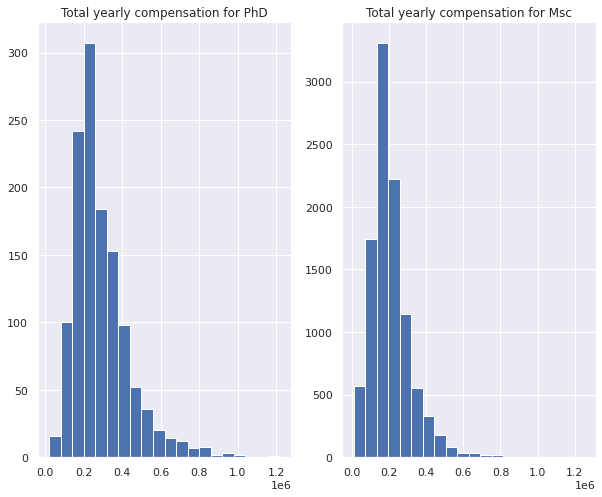

In [17]:
comp_PhD = my_data.loc[my_data_c["Education"]=="PhD","totalyearlycompensation"]
comp_Msc = my_data.loc[my_data_c["Education"]=="Master\'s Degree","totalyearlycompensation"]
fig = plt.figure()
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax1.hist(x = comp_PhD, bins = 20)
ax1.set_title("Total yearly compensation for PhD")
ax2.hist(x = comp_Msc, bins = 20)
ax2.set_title("Total yearly compensation for Msc")
plt.show()

From the histograms we see that the 2 distributions are not Gaussian. Let us apply a logarithmic transformation to fix this issue. 

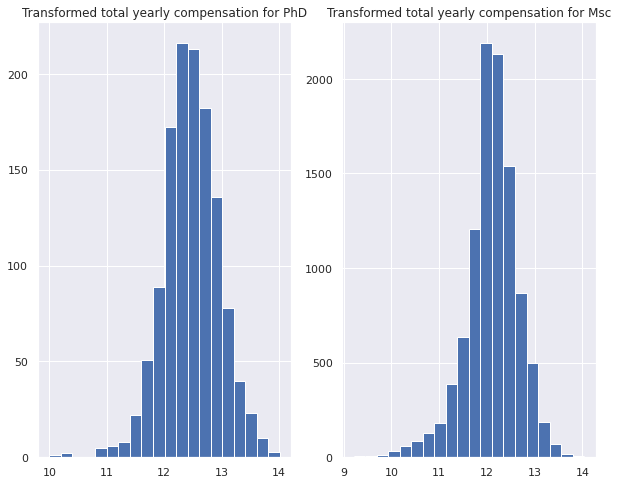

In [18]:
comp_PhD_log = np.log(comp_PhD)
comp_Msc_log = np.log(comp_Msc)
fig = plt.figure()
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax1.hist(x = comp_PhD_log, bins = 20)
ax1.set_title("Transformed total yearly compensation for PhD")
ax2.hist(x = comp_Msc_log, bins = 20)
ax2.set_title("Transformed total yearly compensation for Msc")
plt.show()

The distributions are now roughly Gaussian and we can proceed with the t-test as planned.

*Technical note*: the variances of the 2 populations are not the same. Hence we are going to set the option "equal_var" to False, so to use a Welch's t-test.

In [19]:
a = comp_PhD_log.to_numpy()
b = comp_Msc_log.to_numpy()
st.ttest_ind(a = a, b = b, equal_var = False)

Ttest_indResult(statistic=24.588926574571733, pvalue=2.812498152834655e-114)

The p-value is far smaller than any confidence level we may decide to take. Hence we reject the null hypothesis and we claim that having a PhD has an effect on the salary. 

In our experience, people often misunderstand the meaning of p-values and statistical tests: the p-value is the probability that the data we are looking at is an outlier, given that $ \mathbf{H_0} $ holds true. That is, the p-value is $ P(\mathrm{data} | \mathbf{H_0}) $ and not $ P(\mathbf{H_0} | \mathrm{data}) $. Inspired by [this](http://towardsdatascience.com/ditch-p-values-use-bootstrap-confidence-intervals-instead-bba56322b522) article we decided to confirm the result by using bootstrap confidence intervals.

There are two possible approaches to model the uncertainty in the data: Gaussian and bootsrap confidence intervals. The former assumes that the average salary of the entire population is normally distributed, whereas the latter assumes that the population is distributed as the sample data. We decided to use a bootstrap confidence interval, as it is more flexible than the Gaussian one.

In [20]:
res_boot_sim_PhD = []
res_boot_sim_Msc = []
B = 2000
N = len(my_data_c)
for i in range(B):
    boot_df = my_data_c.sample(N, replace = True)
    M_PhD = np.mean(boot_df.loc[boot_df["Education"]=="PhD","totalyearlycompensation"])
    M_Msc = np.mean(boot_df.loc[boot_df["Education"]=="Master\'s Degree","totalyearlycompensation"])
    res_boot_sim_PhD.append(M_PhD)
    res_boot_sim_Msc.append(M_Msc)

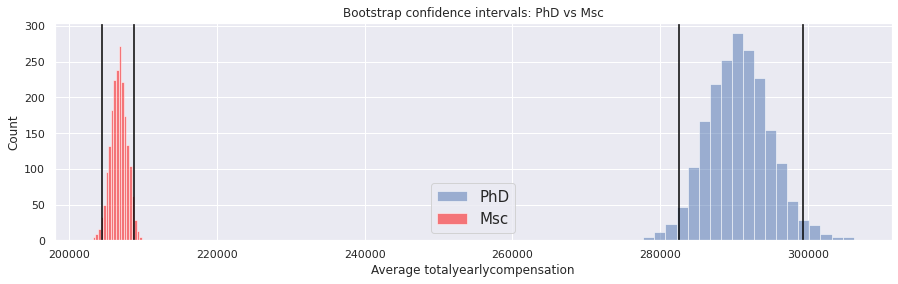

In [21]:
LL_b_PhD = np.quantile(res_boot_sim_PhD, 0.025)
UL_b_PhD = np.quantile(res_boot_sim_PhD, 0.975)
LL_b_Msc = np.quantile(res_boot_sim_Msc, 0.025)
UL_b_Msc = np.quantile(res_boot_sim_Msc, 0.975)

plt.figure(figsize = (15,4))
plt.hist(res_boot_sim_PhD, bins = 20, alpha = 0.5, label = "PhD")
plt.hist(res_boot_sim_Msc, bins = 20, alpha = 0.5, label = "Msc", color ="red")
plt.ylabel('Count')
plt.xlabel('Average totalyearlycompensation')
plt.legend(prop={'size': 15})
plt.axvline(x=LL_b_PhD, color = 'black')
plt.axvline(x=UL_b_PhD, color = 'black')
plt.axvline(x=LL_b_Msc, color = 'black')
plt.axvline(x=UL_b_Msc, color = 'black')
plt.title('Bootstrap confidence intervals: PhD vs Msc')
plt.show()

The bootstrap confidence intervals confirm our hypothesis: the average salary of PhDs is higher than Master's. 
The black lines in the plot above are the 95% bootstrap confidence intervals of the respective class. These do not overlap and are far apart, meaning that there is a substantial difference between the average salary of employees with a Master's Degree and the ones with a PhD. Note that this difference roughly agrees with what we have found in our data (which was around 33%).

# Conclusion

In this notebook we have analysed the salaries of STEM employees working at tech companies. Our goal was to establish if employees with a PhD have, on average, a higher salary than workers with a Master's Degree. Let us summarise our results:
* PhDs are a small minority of all employees, as expected. However the percentage of PhDs does depend on the job title;
* the effect of having a PhD on the salary depends on the job title as well. Hence, we decided to focus the rest of the study on a specific category of jobs;
* we considered the possibility that the years of experience would influence the effect of the PhD on the salary. However, this does not seem to be the case: the salary is increasing in the years of experience, but having a PhD has a positive effect on the salary independently on the years of experience;
* the next step was to proceed with a t-test. This confirmed our hypothesis, that is, the PhD influences the average salary;
* finally, we used a bootstrap confidence interval to confirm the result of the t-test.


**Hence, despite all difficulties, the daily struggles, the terrible days in which you believe you will never make it, stay strong and keep going, at the end you will get your just reward!... if you are a data scientist... and work in the USA... in a big tech company :)**